### Importing all the required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
"""To remove Warnings which are versions warning and does not effect our code"""

'To remove Warnings which are versions warning and does not effect our code'

In [3]:
#load the dataset
data = pd.read_csv("songs_dataset.csv")

In [4]:
data.head()# to print first 5 rows of our dataframe named data

,Unnamed: 0,artist_name,track_name,popularity,year,genre,danceability,loudness,instrumentalness,liveness,duration_ms
0,0,Jason Mraz,I Won't Give Up,68,2012,acoustic,0.483,-10.058,0.000000,0.1150,240166
1,1,Jason Mraz,93 Million Miles,50,2012,acoustic,0.572,-10.286,0.000014,0.0974,216387
2,2,Joshua Hyslop,Do Not Let Me Go,57,2012,acoustic,0.409,-13.711,0.000050,0.0895,158960
3,3,Boyce Avenue,Fast Car,58,2012,acoustic,0.392,-9.845,0.000000,0.0797,304293
4,4,Andrew Belle,Sky's Still Blue,54,2012,acoustic,0.430,-5.419,0.019300,0.1100,244320


In [5]:
data.tail()# to print last 5 rows of our dataframe named data

,Unnamed: 0,artist_name,track_name,popularity,year,genre,danceability,loudness,instrumentalness,liveness,duration_ms
119449,119449,Ledisi,Shine,12,2011,soul,0.721,-5.153,0.000044,0.1150,229827
119450,119450,Mary J. Blige,Intro / My Life II...The Journey Continues / M...,13,2011,soul,0.641,-14.776,0.000084,0.1060,76200
119451,119451,Benny Sings,This Is A Samba,16,2011,soul,0.879,-11.414,0.017000,0.0983,142133
119452,119452,Tyrese,Angel,11,2011,soul,0.529,-7.614,0.000000,0.1330,263613
119453,119453,Dusty Springfield,A House Is Not a Home - Live,17,2011,soul,0.281,-11.398,0.000004,0.7330,252720


### Data Cleaning & Perform exploratory data analysis (EDA)

In [6]:
# Remove the 'Unnamed: 0' column
data = data.drop(["Unnamed: 0"], axis=1)

In [7]:
# Create a copy of the DataFrame
df = data.copy()

In [8]:
# Drop columns that won't be used for modeling
df = df.drop(["artist_name", "track_name"], axis=1)

In [9]:
# Standardize numerical features
col = ['popularity', 'danceability', 'duration_ms', 'instrumentalness', 'liveness', 'loudness']
scaler = StandardScaler()
df[col] = scaler.fit_transform(df[col])
df[col]

,popularity,danceability,duration_ms,instrumentalness,liveness,loudness
0,3.159614,0.078695,-0.091993,-0.991832,-0.417344,0.524306
1,1.990829,0.538605,-0.183467,-0.991799,-0.516563,0.497745
2,2.445357,-0.303702,-0.404381,-0.991712,-0.561099,0.098751
3,2.510289,-0.391550,0.154695,-0.991832,-0.616346,0.549119
4,2.250559,-0.195184,-0.076013,-0.945698,-0.445531,1.064724
...,...,...,...,...,...,...
119449,-0.476608,1.308567,-0.131765,-0.991726,-0.417344,1.095711
119450,-0.411675,0.895165,-0.722747,-0.991631,-0.468081,-0.025315
119451,-0.216878,2.125037,-0.469112,-0.951196,-0.511489,0.366339
119452,-0.541540,0.316401,-0.001795,-0.991832,-0.315870,0.809018


In [10]:
# One-hot encode the 'genre' column
encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
enc = pd.DataFrame(encoder.fit_transform(np.array(df["genre"]).reshape(-1, 1)))
enc.columns = df["genre"].unique()

In [11]:
# Add one-hot encoded genre columns to the DataFrame
df[enc.columns] = enc

In [12]:
# Drop the original 'genre' column
df = df.drop("genre", axis=1)

In [13]:
# Create a copy of the DataFrame for modeling without 'artist' and 'name' columns
df["name"] = data["track_name"]
df["artist"] = data["artist_name"]

df_2 = df.drop(["artist","name"],axis=1)


### Visualize correlations between features

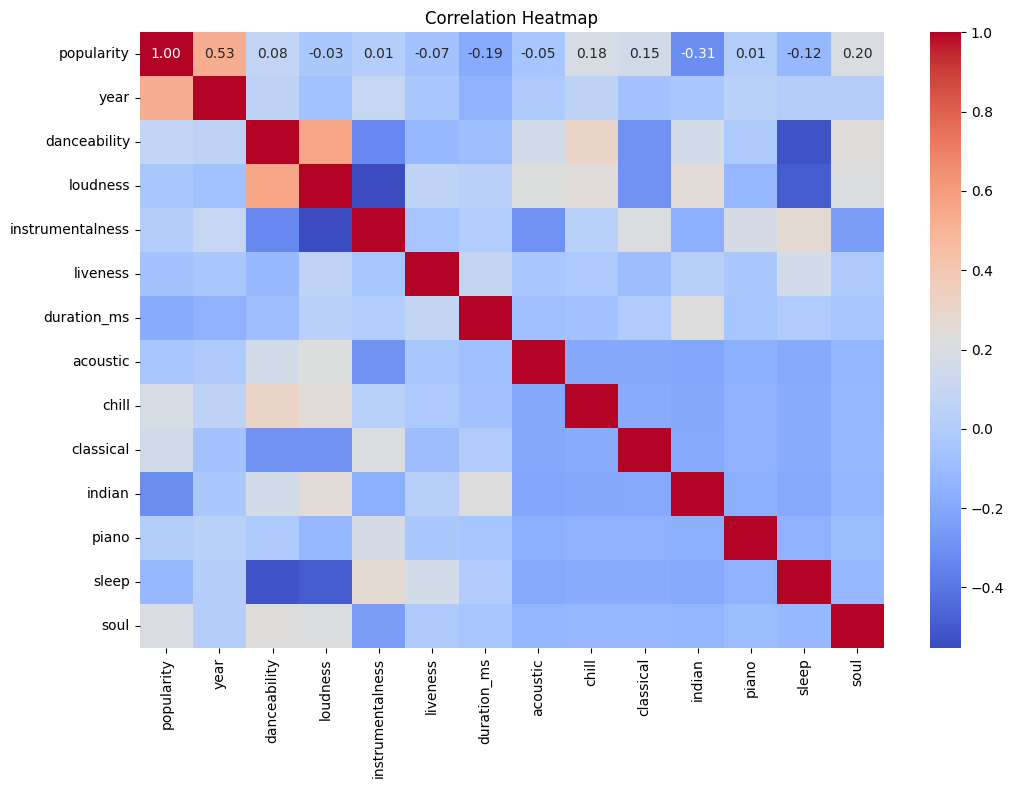

In [14]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Plot the correlation heatmap for numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Model-1: K-Means Clustering
### By popularity

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

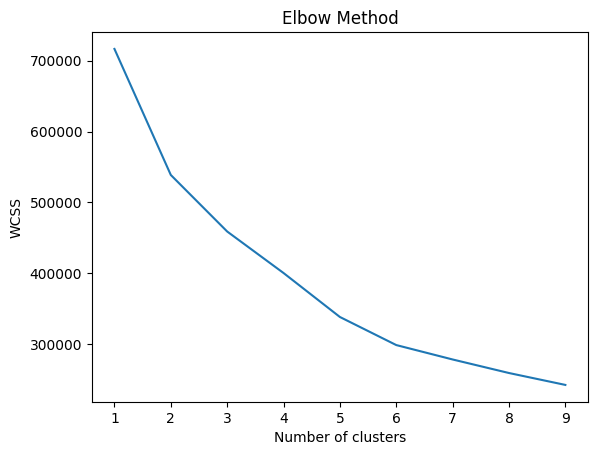

In [16]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df[col])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [17]:
clusters_new = KMeans(6, random_state=42)
clusters_new.fit(df[col])
clusters_new.labels_

array([3, 3, 3, ..., 1, 1, 2])

In [18]:
df['clusterid_new'] = clusters_new.labels_
df

,popularity,year,danceability,loudness,instrumentalness,liveness,duration_ms,acoustic,chill,classical,indian,piano,sleep,soul,name,artist,clusterid_new
0,3.159614,2012,0.078695,0.524306,-0.991832,-0.417344,-0.091993,1.0,0.0,0.0,0.0,0.0,0.0,0.0,I Won't Give Up,Jason Mraz,3
1,1.990829,2012,0.538605,0.497745,-0.991799,-0.516563,-0.183467,1.0,0.0,0.0,0.0,0.0,0.0,0.0,93 Million Miles,Jason Mraz,3
2,2.445357,2012,-0.303702,0.098751,-0.991712,-0.561099,-0.404381,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Do Not Let Me Go,Joshua Hyslop,3
3,2.510289,2012,-0.391550,0.549119,-0.991832,-0.616346,0.154695,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Fast Car,Boyce Avenue,3
4,2.250559,2012,-0.195184,1.064724,-0.945698,-0.445531,-0.076013,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Sky's Still Blue,Andrew Belle,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119449,-0.476608,2011,1.308567,1.095711,-0.991726,-0.417344,-0.131765,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Shine,Ledisi,1
119450,-0.411675,2011,0.895165,-0.025315,-0.991631,-0.468081,-0.722747,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Intro / My Life II...The Journey Continues / M...,Mary J. Blige,1
119451,-0.216878,2011,2.125037,0.366339,-0.951196,-0.511489,-0.469112,0.0,0.0,0.0,0.0,0.0,0.0,1.0,This Is A Samba,Benny Sings,1
119452,-0.541540,2011,0.316401,0.809018,-0.991832,-0.315870,-0.001795,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Angel,Tyrese,1


In [19]:
clusters_new.cluster_centers_

array([[ 1.94285610e-01, -1.06896312e+00, -1.65244618e-01,
         9.03820090e-01, -3.14581033e-01, -1.35301219e+00],
       [-6.63313876e-01,  2.42450449e-01, -5.64928468e-03,
        -8.96566746e-01, -1.45403967e-01,  5.39676805e-01],
       [-2.14634173e-01, -5.25456925e-01,  4.35206388e-02,
         7.31327416e-04,  3.20412396e+00, -5.78173966e-03],
       [ 1.17772763e+00,  7.26683448e-01, -1.87494905e-01,
        -7.96192655e-01, -1.76462568e-01,  6.82509174e-01],
       [-2.72824567e-01,  3.80841283e-01, -2.89431062e-02,
         1.01305453e+00, -2.67033548e-01,  1.32968903e-01],
       [-8.53045681e-01, -7.21919357e-01,  6.98075247e+00,
         1.47982916e-01,  5.51048361e-01, -2.39341020e-01]])

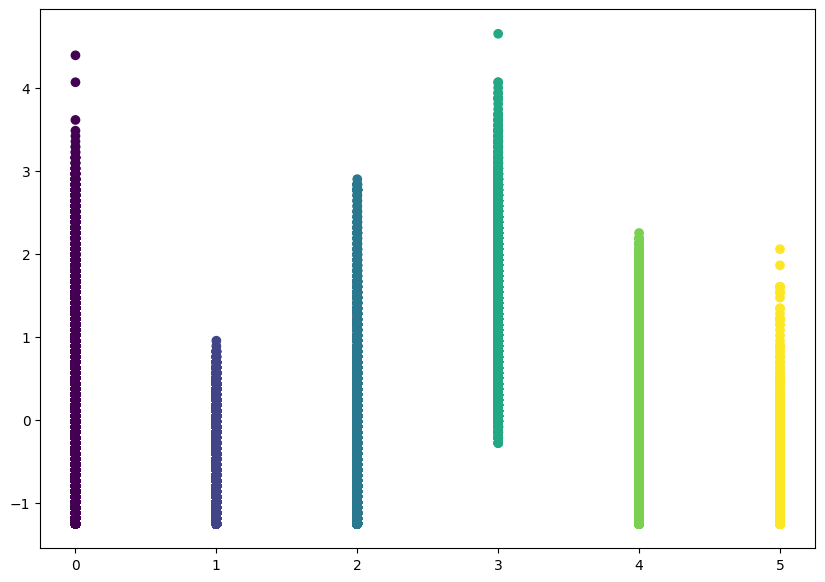

In [20]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['clusterid_new'],df['popularity'], c=clusters_new.labels_) 

In [21]:
def recommend_songs(input_song, num_recommendations=10):
    # Find the cluster of the input song
    input_song_cluster = df.loc[df['name'] == input_song, 'clusterid_new'].values[0]
    
    # Filter songs that belong to the same cluster as the input song
    recommended_songs = df[df['clusterid_new'] == input_song_cluster]
    
    # Exclude the input song from recommendations
    recommended_songs = recommended_songs[recommended_songs['name'] != input_song]
    
    # Sort recommended songs by popularity or any other relevant feature
    recommended_songs = recommended_songs.sort_values(by='popularity', ascending=False)
    
    # Return the top N recommendations
    return recommended_songs[['name', 'artist']].head(num_recommendations)

In [22]:
input_song = "Shine"  # Replace with the song you want recommendations for
recommendations = recommend_songs(input_song)
print("Recommendations for '{}':".format(input_song))
print(recommendations)

Recommendations for 'Shine':
                                                     name          artist
2083                                   ANGEL OF SALVATION       GALNERYUS
87895                           The King for a 1000 Years       Helloween
70223                                         Unholy Wars           ANGRA
74307                                    The Great Debate   Dream Theater
74332                    VIII. Losing Time / Grand Finale   Dream Theater
79088                                       San Sebastian  Sonata Arctica
101582                                       Head Up High        Firewind
96932   Memoro De La Stono​~​Distant Worlds (Final Fan...   Nobuo Uematsu
38709          Cosmic Power of the Infinite Shred Machine     DragonForce
55817                                      The First Noël  Andrea Bocelli


# Model-2: KNN

In [23]:
from sklearn.neighbors import NearestNeighbors

In [24]:
# Create the KNN model
knn_model = NearestNeighbors(n_neighbors=10, metric='cosine')  # Adjust the number of neighbors as needed

# Fit the model on your preprocessed data
knn_model.fit(df_2)

NearestNeighbors(metric='cosine', n_neighbors=10)

In [25]:
def sim_track_find(song_name):
    a = 0
    b = 0
    song = []
    indexes = []
    for i in data["track_name"]:
        if song_name.lower() in i.lower():
            song.append(df_2[a:a+1].values)
            indexes.append(a)
            b+=1
        a+=1
    if b == 0:
        print("Nothing found. Please try something else :)")
        return 0
        
    return song[0][0], indexes[0]

In [26]:
def recommend_songs(song_name, num_recommendations=10):
    song_data, song_index = sim_track_find(song_name)
    
    if song_data is not None:
        # Use the KNN model to find the nearest neighbors
        distances, indices = knn_model.kneighbors([song_data], n_neighbors=num_recommendations+1)
        
        # Exclude the input song itself from recommendations
        indices = indices[:, 1:]
        
        recommended_songs = []
        for index in indices[0]:
            recommended_songs.append((df["name"][index], df["artist"][index]))
        
        return recommended_songs
    else:
        return []

recommended_songs = recommend_songs("Fast Car")
for i, (song_name, artist) in enumerate(recommended_songs, start=1):
    print(f"{i}. {song_name} by {artist}")

1. The Trouble with Wanting by Joy Williams
2. What About Us - Acoustic by Thomas Daniel
3. Home by Gabrielle Aplin
4. Breathe (2 AM) by Anna Nalick
5. Can You Feel the Love Tonight by Boyce Avenue
6. A Thousand Years by Boyce Avenue
7. Light Me Up by Ingrid Michaelson
8. Time After Time by Boyce Avenue
9. A Safe Place to Land (feat. John Legend) by Sara Bareilles
10. Moon River by JJ Heller


# Model 3: Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor
features = ['danceability', 'duration_ms', 'instrumentalness', 'liveness', 'loudness']

X = df[features]
y = df["popularity"] 

In [28]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

RandomForestRegressor(random_state=42)

In [29]:
def recommend_songs_rf(model, input_features, num_recommendations=10):
    # Predict popularity scores for input features
    predicted_popularity = model.predict(input_features)
    
    # Combine predicted popularity scores with song names and artists
    recommendations_df = pd.DataFrame({
        'name': df['name'],
        'artist': df['artist'],
        'predicted_popularity': predicted_popularity
    })
    
    # Sort recommendations by predicted popularity in descending order
    recommendations_df = recommendations_df.sort_values(
        by='predicted_popularity',
        ascending=False
    )
    
    # Exclude songs that were in the input features
    recommendations_df = recommendations_df[~recommendations_df.index.isin(input_features.index)]
    
    # Return the top N recommended songs
    recommended_songs = recommendations_df.head(num_recommendations)
    return recommended_songs






In [30]:
recommended_songs


[('The Trouble with Wanting', 'Joy Williams'),
 ('What About Us - Acoustic', 'Thomas Daniel'),
 ('Home', 'Gabrielle Aplin'),
 ('Breathe (2 AM)', 'Anna Nalick'),
 ('Can You Feel the Love Tonight', 'Boyce Avenue'),
 ('A Thousand Years', 'Boyce Avenue'),
 ('Light Me Up', 'Ingrid Michaelson'),
 ('Time After Time', 'Boyce Avenue'),
 ('A Safe Place to Land (feat. John Legend)', 'Sara Bareilles'),
 ('Moon River', 'JJ Heller')]

### 4. Defining function for song recommendation by artist

In [31]:
def find_song_by_artist(artist_name):
    a = 0
    b = 0
    found_songs = []  # Create an empty list to store the found songs
    for i in data["artist_name"]:
        if artist_name.lower() in i.lower():
            found_songs.append((data["track_name"][a], data["artist_name"][a]))
            b += 1
        a += 1
    if b == 0:
        print("Nothing found. Please try something else :)")
    else:
        # Convert the list of found songs to a DataFrame
        found_songs_df = pd.DataFrame(found_songs, columns=["Song Name", "Artist"])
        
        # Display the top 10 found songs
        print(found_songs_df.head(10))

In [32]:
artist_name = input("Enter the artist's name: ")
find_song_by_artist(artist_name)

Enter the artist's name:  AJJ


                 Song Name Artist
0                Black Dog    AJJ
1     Hate Song for Brains    AJJ
2             Lady Liberty    AJJ
3       Lookin' for a Love    AJJ
4  Dipping Things in Stuff    AJJ
5           Skipping Stone    AJJ
6        This Is Not a War    AJJ
7              Hate & Kill    AJJ
8             Lucky Strike    AJJ
9     Joe Arpaio Is a Punk    AJJ


### 5. Defining function for song recommendation by genre

In [33]:
def find_songs_by_genre(genre):
    songs_in_genre = df[df[genre] == 1]
    if songs_in_genre.empty:
        print("No songs found in the genre:", genre)
    else:
        print("Songs in the genre:", genre)
        print(songs_in_genre[["name", "artist"]].head(10))

In [34]:
genre_input = input("Enter the genre you want to find songs for: ")
find_songs_by_genre(genre_input)

Enter the genre you want to find songs for:  chill


Songs in the genre: chill
                   name             artist
968  How Did I Get Here             ODESZA
969          fineshrine        Purity Ring
970        Another Love          Tom Odell
971             Origins             Tennis
972          Don't Stop             ODESZA
973      IPlayYouListen             ODESZA
974          I Wanna Go       Summer Heart
975          MN84 Theme  Miami Nights 1984
976      A Great Design       Black Marble
977                Baby         Ariel Pink


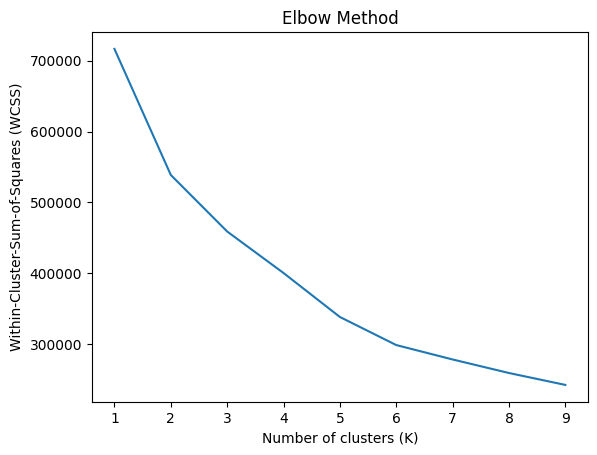

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 0.7468055685074164
Mean Squared Error (MSE): 0.8511617044328782
R-squared (R2) Score: 0.15037965668472664


In [37]:
import joblib

# Save the K-Means clustering model
model_filename = "kmeans_model.pkl"
joblib.dump(clusters_new, model_filename)

['kmeans_model.pkl']

In [38]:
# Save the DataFrame containing your data
data_filename = "songs_data.pkl"
joblib.dump(df, data_filename)

['songs_data.pkl']

In [39]:
# Save the dataset
joblib.dump(data, "songs_dataset.pkl")

['songs_dataset.pkl']